In [13]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import h5py

In [2]:
data = np.loadtxt('./2201_2211.dat')

In [3]:
spin = data[:, 0]
real_part = data[:, 1]
imag_part = data[:, 2]

spin = np.array(spin)
real_part = np.array(real_part)
imag_part = np.array(imag_part)

sort_idx = np.argsort(spin)
spin_sorted = spin[sort_idx]
real_sorted = real_part[sort_idx]
imag_sorted = imag_part[sort_idx]

complex_ratio = real_sorted + 1j * imag_sorted

In [4]:
interp_complex = interp1d(spin_sorted, complex_ratio, kind='cubic', fill_value="extrapolate")

In [5]:
def get_ratio(spin_value):
    """
    根据给定的自旋值返回对应的复数ratio
    
    参数:
    spin_value: 自旋值 (0-1之间)
    
    返回:
    complex: 对应的复数ratio
    """
    return interp_complex(spin_value)

In [6]:
test_spins = [0.25, 0.35, 0.65, 0.85]
for s in test_spins:
    ratio = get_ratio(s)
    print(f"自旋 {s:.2f}: ratio = {ratio.real:.2f} + {ratio.imag:.2f}j")

自旋 0.25: ratio = -11547.95 + 29204.53j
自旋 0.35: ratio = -3069.88 + 14893.93j
自旋 0.65: ratio = -3065.65 + -1187.77j
自旋 0.85: ratio = 662.32 + 336.70j


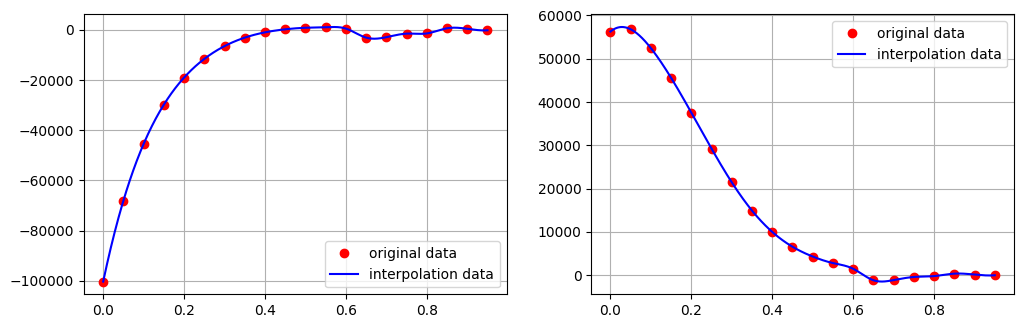

In [7]:
plt.figure(figsize=(12, 8))

# 实部
plt.subplot(2, 2, 1)
spin_dense = np.linspace(spin_sorted.min(), spin_sorted.max(), 1000)
plt.plot(spin_sorted, real_sorted, 'ro', label='original data')
plt.plot(spin_dense, interp_complex(spin_dense).real, 'b-', label='interpolation data')
plt.legend()
plt.grid(True)

# 幅值
plt.subplot(2, 2, 2)
spin_dense = np.linspace(spin_sorted.min(), spin_sorted.max(), 1000)
plt.plot(spin_sorted, imag_sorted, 'ro', label='original data')
plt.plot(spin_dense, interp_complex(spin_dense).imag, 'b-', label='interpolation data')
plt.legend()
plt.grid(True)

In [38]:
np.save('spin_220221_interpolation.npy', {
        'spin': spin_sorted,
        '220221_complex_ratio': complex_ratio
})

# 220220 from Sizheng

In [11]:
def read_data(file, channel, resolution):
    res = h5py.File(file)
    spin = res[channel]['Complex{MultiFloat{Float64, 4}}'][resolution]['separation_radial']['spheroidal']['a'][:]
    spin = [float(i[0].decode('utf-8')) for i in spin]
    l4 = res[channel]['Complex{MultiFloat{Float64, 4}}'][resolution]['separation_radial']['spheroidal']['Ratio'][:,0]
    final = [complex(i.decode('utf-8').replace('im', '1j').replace(' ', '')) for i in l4]
    return np.array(spin), np.array(final)

In [14]:
spin_DI , ratio_DI = read_data('./QQNM/quadratic_2201_2-20-1.h5','+-','nmax_63_lmax_31')

In [15]:
spin_DI

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [16]:
ratio_DI

array([0.01646463+1.03476812e-03j, 0.01647858+8.84809916e-04j,
       0.01649378+7.45544190e-04j, 0.01650246+6.11499061e-04j,
       0.01650157+4.76724331e-04j, 0.01649098+3.36332982e-04j,
       0.01647195+1.86843588e-04j, 0.01644619+2.59391092e-51j,
       0.01641534-1.47964181e-04j, 0.01638083-3.36131456e-04j,
       0.01634399-5.39826436e-04j, 0.01630614-7.60516881e-04j,
       0.01626892-9.99979178e-04j, 0.01623453-1.26030518e-03j,
       0.01620615-1.54377132e-03j, 0.01618852-1.85241423e-03j,
       0.01618881-2.18682229e-03j, 0.01621771-2.54250878e-03j,
       0.0162892 -2.89729797e-03j, 0.01639714-3.15221891e-03j])

In [20]:
spin_DD, ratio_DD = read_data("./QQNM/quadratic_2201_2201.h5", '++', 'nmax_127_lmax_31')

In [21]:
ratio_DD

array([0.13659455-1.14388163e-02j, 0.13641747-1.07466072e-02j,
       0.13615593-1.00406974e-02j, 0.13580429-9.32200327e-03j,
       0.13535626-8.59168546e-03j, 0.13480478-7.85118688e-03j,
       0.13414188-7.10228111e-03j, 0.1333584 -6.34713585e-03j,
       0.13244368-5.58839847e-03j, 0.13138512-4.82931454e-03j,
       0.13016757-4.07389707e-03j, 0.12877239-3.32717605e-03j,
       0.12717609-2.59558014e-03j, 0.12534817-1.88754529e-03j,
       0.12324751-1.21453669e-03j, 0.12081599-5.92878716e-04j,
       0.11796604-4.73297364e-51j, 0.11455296+3.81005535e-04j,
       0.11029979+6.13311963e-04j, 0.1045037 +4.48951560e-04j])

In [22]:
total_ratio = ratio_DI + ratio_DD

In [23]:
sort_idx = np.argsort(spin_DD)

spin_DD_sorted = spin_DD[sort_idx]
total_ratio_sorted = total_ratio[sort_idx]

In [24]:
spin_DD_sorted

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [25]:
total_ratio_sorted

array([0.15305918-0.01040405j, 0.15289604-0.0098618j ,
       0.15264972-0.00929515j, 0.15230675-0.0087105j ,
       0.15185782-0.00811496j, 0.15129576-0.00751485j,
       0.15061384-0.00691544j, 0.1498046 -0.00634714j,
       0.14885902-0.00573636j, 0.14776596-0.00516545j,
       0.14651156-0.00461372j, 0.14507854-0.00408769j,
       0.14344502-0.00359556j, 0.1415827 -0.00314785j,
       0.13945366-0.00275831j, 0.13700451-0.00244529j,
       0.13415485-0.00218682j, 0.13077067-0.0021615j ,
       0.12658899-0.00228399j, 0.12090084-0.00270327j])

In [26]:
interp_220220 = interp1d(spin_DD_sorted, total_ratio_sorted, kind='cubic', fill_value="extrapolate")

Text(0, 0.5, '220220 ratio abs')

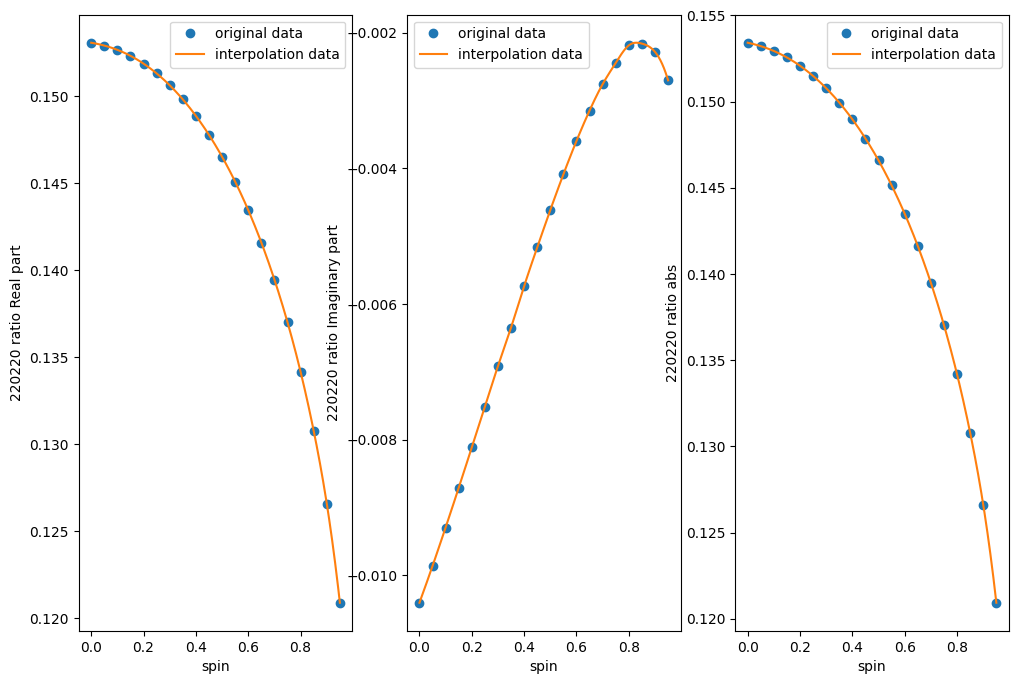

In [35]:
plt.figure(figsize=(12, 8))

spin_dense = np.linspace(spin_DD_sorted.min(), spin_DD_sorted.max(), 1000)

# 实部
plt.subplot(1, 3, 1)
plt.plot(spin_DD_sorted, total_ratio_sorted.real, 'o', label='original data')
plt.plot(spin_dense, interp_220220(spin_dense).real, label='interpolation data')
plt.legend()
plt.xlabel('spin')
plt.ylabel('220220 ratio Real part')

# 幅值
plt.subplot(1, 3, 2)
plt.plot(spin_DD_sorted, total_ratio_sorted.imag, 'o',label='original data')
plt.plot(spin_dense, interp_220220(spin_dense).imag,label='interpolation data')
plt.legend()
plt.xlabel('spin')
plt.ylabel('220220 ratio Imaginary part')

plt.subplot(1, 3, 3)
plt.plot(spin_DD_sorted, abs(total_ratio_sorted), 'o',label='original data')
plt.plot(spin_dense, abs(interp_220220(spin_dense)),label='interpolation data')
plt.legend()
plt.xlabel('spin')
plt.ylabel('220220 ratio abs')

In [37]:
np.save('spin_220220_interpolation.npy', {
        'spin': spin_DD_sorted,
        '220220_complex_ratio': total_ratio_sorted
})

# Further check

In [47]:
def load_interpolation_function(filename='spin_ratio_interpolation.npy',label='220220'):
    """
    加载插值函数参数
    """
    data = np.load(filename, allow_pickle=True).item()
    spin_loaded = data['spin']
    complex_ratio_loaded = data[label+'_complex_ratio']
    interp_loaded = interp1d(spin_loaded, complex_ratio_loaded, kind='cubic', fill_value="extrapolate")
    return interp_loaded, spin_loaded, complex_ratio_loaded


def get_plot(spin_DD_sorted, total_ratio_sorted, interp_220220, label='220220'):
    plt.figure(figsize=(12, 8))

    spin_dense = np.linspace(spin_DD_sorted.min(), spin_DD_sorted.max(), 1000)

    # 实部
    plt.subplot(1, 3, 1)
    plt.plot(spin_DD_sorted, total_ratio_sorted.real, 'o', label='original data')
    plt.plot(spin_dense, interp_220220(spin_dense).real, label='interpolation data')
    plt.legend()
    plt.xlabel('spin')
    plt.ylabel(label+' ratio Real part')

    # 幅值
    plt.subplot(1, 3, 2)
    plt.plot(spin_DD_sorted, total_ratio_sorted.imag, 'o',label='original data')
    plt.plot(spin_dense, interp_220220(spin_dense).imag,label='interpolation data')
    plt.legend()
    plt.xlabel('spin')
    plt.ylabel(label+' ratio Imaginary part')
    plt.title(label + ' interpolation')

    plt.subplot(1, 3, 3)
    plt.plot(spin_DD_sorted, abs(total_ratio_sorted), 'o',label='original data')
    plt.plot(spin_dense, abs(interp_220220(spin_dense)),label='interpolation data')
    plt.legend()
    plt.xlabel('spin')
    plt.ylabel(label+' ratio abs')

    plt.show()

In [48]:
load_interp, load_spin, load_ratio = load_interpolation_function('spin_220220_interpolation.npy', '220220')

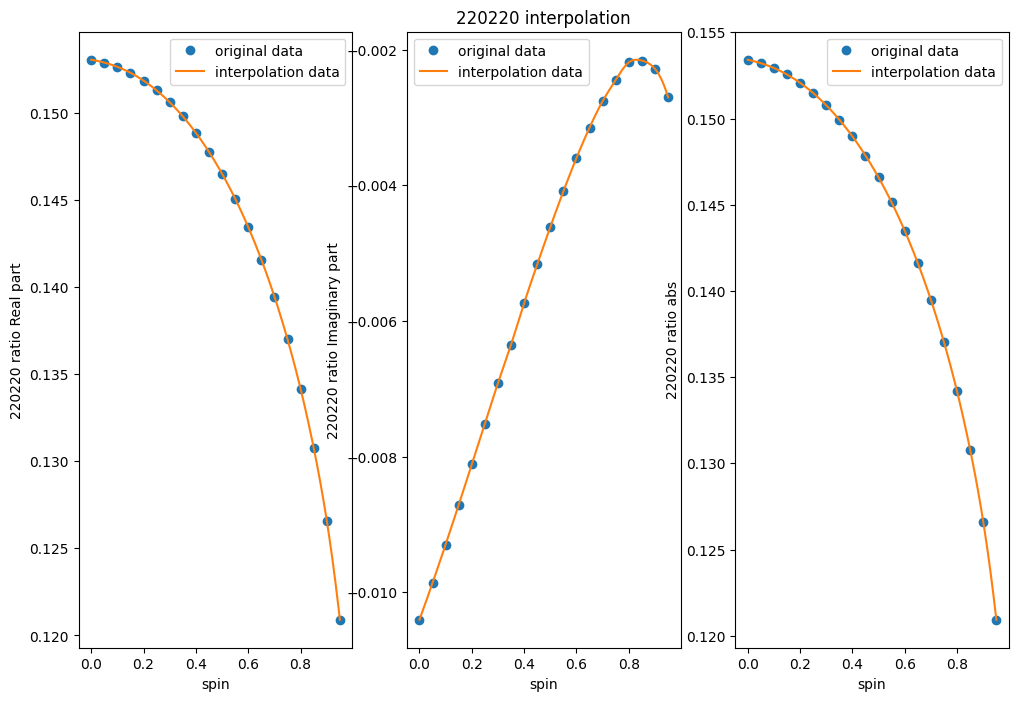

In [49]:
get_plot(load_spin, load_ratio, load_interp, '220220')

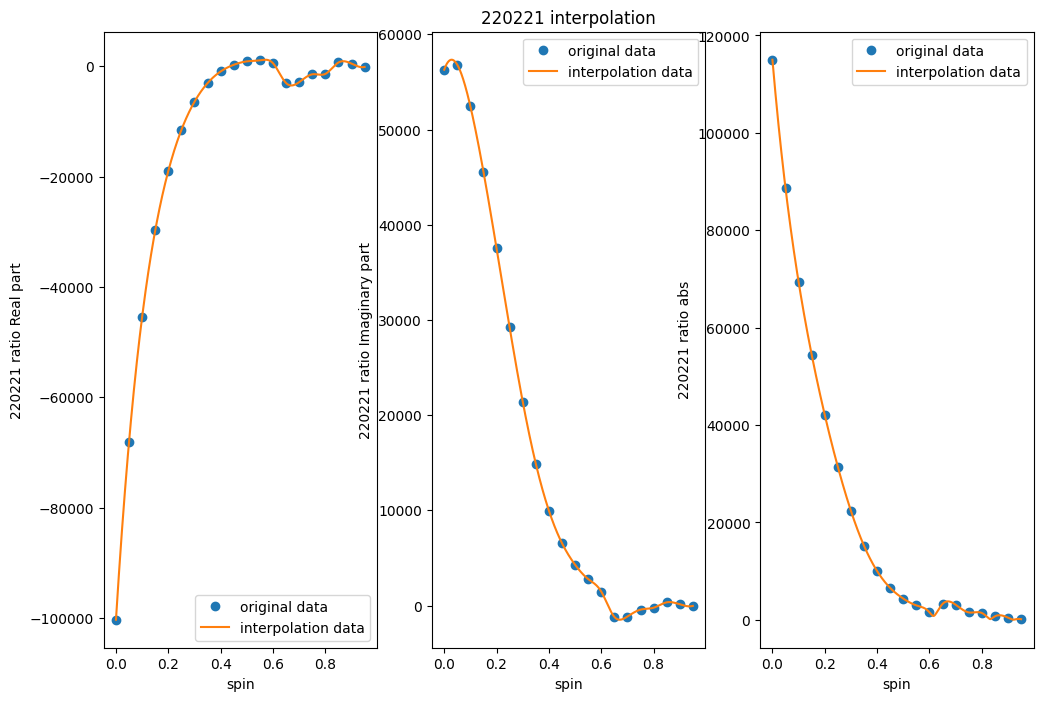

In [51]:
load_interp, load_spin, load_ratio = load_interpolation_function('spin_220221_interpolation.npy', '220221')
get_plot(load_spin, load_ratio, load_interp, '220221')